<a href="https://colab.research.google.com/github/SherlyC799/git_work/blob/master/Movie_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as p
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()
# Use the correct key '.csv' to access the uploaded file
d= pd.read_csv(io.BytesIO(uploaded['mm.csv']), encoding='latin-1', on_bad_lines='skip')

Saving mm.csv to mm.csv


In [4]:
d.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173


In [5]:
d.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

<Axes: >

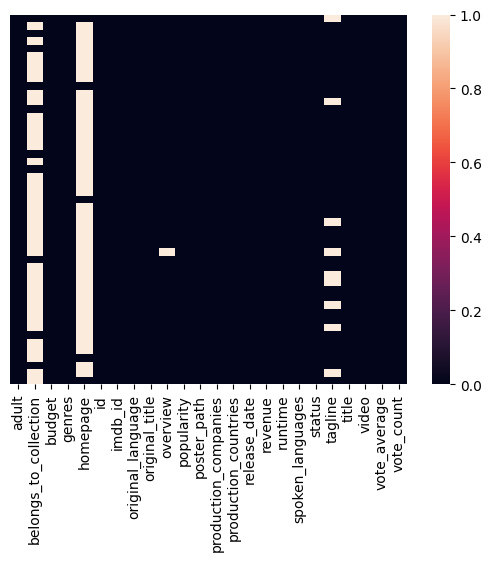

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(d.isnull(),yticklabels=False)

In [7]:
df=d.copy()
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173


In [8]:
import pandas as pd

# Set option to display all columns
pd.set_option('display.max_columns', None)

# Print the DataFrame
print(df)


    adult                              belongs_to_collection    budget  \
0   False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1   False                                                NaN  65000000   
2   False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3   False                                                NaN  16000000   
4   False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
5   False                                                NaN  60000000   
6   False                                                NaN  58000000   
7   False                                                NaN         0   
8   False                                                NaN  35000000   
9   False  {'id': 645, 'name': 'James Bond Collection', '...  58000000   
10  False                                                NaN  62000000   
11  False                                                NaN         0   
12  False  {'id': 117693, 'name': 'Bal

In [9]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [10]:
df.drop(['homepage','id','poster_path','production_companies','production_countries', 'belongs_to_collection','tagline','video'],axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              49 non-null     bool   
 1   budget             49 non-null     int64  
 2   genres             49 non-null     object 
 3   imdb_id            49 non-null     object 
 4   original_language  49 non-null     object 
 5   original_title     49 non-null     object 
 6   overview           48 non-null     object 
 7   popularity         49 non-null     float64
 8   release_date       49 non-null     object 
 9   revenue            49 non-null     int64  
 10  runtime            49 non-null     float64
 11  spoken_languages   49 non-null     object 
 12  status             49 non-null     object 
 13  title              49 non-null     object 
 14  vote_average       49 non-null     float64
 15  vote_count         49 non-null     int64  
dtypes: bool(1), float64(3), int6

<Axes: >

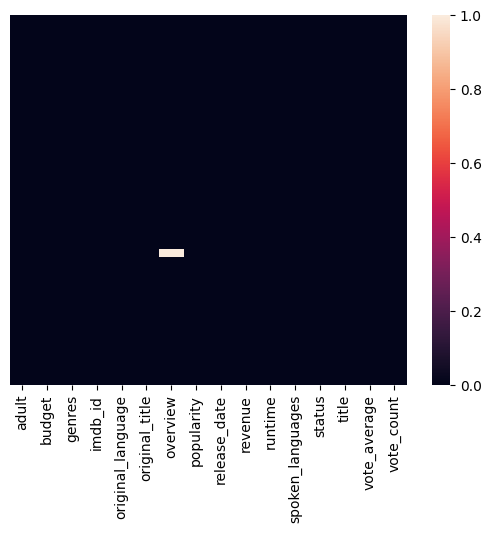

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(),yticklabels=False)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              49 non-null     bool   
 1   budget             49 non-null     int64  
 2   genres             49 non-null     object 
 3   imdb_id            49 non-null     object 
 4   original_language  49 non-null     object 
 5   original_title     49 non-null     object 
 6   overview           48 non-null     object 
 7   popularity         49 non-null     float64
 8   release_date       49 non-null     object 
 9   revenue            49 non-null     int64  
 10  runtime            49 non-null     float64
 11  spoken_languages   49 non-null     object 
 12  status             49 non-null     object 
 13  title              49 non-null     object 
 14  vote_average       49 non-null     float64
 15  vote_count         49 non-null     int64  
dtypes: bool(1), float64(3), int6

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

,0
adult,0
budget,0
genres,0
imdb_id,0
original_language,0
original_title,0
overview,0
popularity,0
release_date,0
revenue,0


In [16]:
import pandas as pd

C = df['vote_average'].mean()
m = df['vote_count'].quantile(0.75)

# Calculate weighted average score
def weighted_average(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v / (v + m)) * R + (m / (v + m)) * C

# Apply the function to the DataFrame
df['weighted_average'] = df.apply(weighted_average, axis=1)
df = df.sort_values(by='weighted_average', ascending=False)

# Calculate popularity score (example: simple addition of votes and weighted average)
df['popularity_score'] = df['weighted_average'] + df['vote_count']

# Print the DataFrame with the new columns
print(df)

    adult    budget                                             genres  \
45  False  33000000  [{'id': 80, 'name': 'Crime'}, {'id': 9648, 'na...   
48  False   6000000  [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...   
0   False  30000000  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
5   False  60000000  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
15  False  52000000  [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...   
30  False  29500000  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
28  False  18000000  [{'id': 14, 'name': 'Fantasy'}, {'id': 878, 'n...   
1   False  65000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
34  False  11000000                      [{'id': 18, 'name': 'Drama'}]   
16  False  16500000  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
12  False         0  [{'id': 10751, 'name': 'Family'}, {'id': 16, '...   
24  False   3600000  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
37  False  12000000  [{'id': 35, 'name

In [17]:
df.head()

,adult,budget,genres,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,weighted_average,popularity_score
45,False,33000000,"[{'id': 80, 'name': 'Crime'}, {'id': 9648, 'na...",tt0114369,en,Se7en,Two homicide detectives are on a desperate hun...,18.457430,1995-09-22,327311859,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Se7en,8.1,5915,7.958332,5922.958332
48,False,6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",tt0114814,en,The Usual Suspects,"Held in an L.A. interrogation room, Verbal Kin...",16.302466,1995-07-19,23341568,106.0,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,The Usual Suspects,8.1,3334,7.865228,3341.865228
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415,7.586038,5422.586038
5,False,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,1995-12-15,187436818,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Heat,7.7,1886,7.423824,1893.423824
15,False,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",tt0112641,en,Casino,The life of the gambling paradise  Las Vegas ...,10.137389,1995-11-22,116112375,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Casino,7.8,1343,7.415734,1350.415734


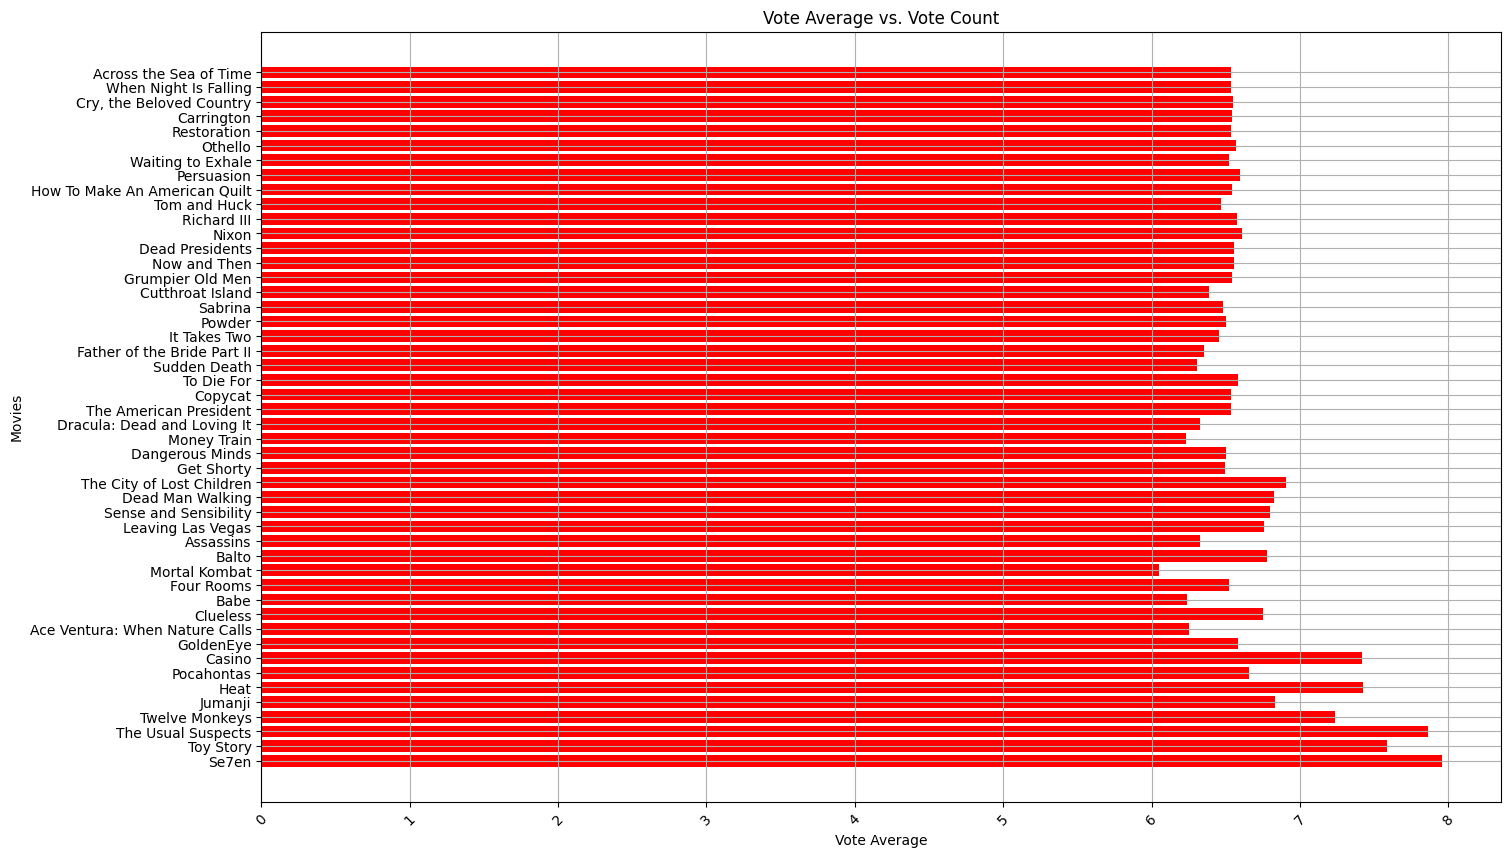

In [18]:
import pandas as pd
from matplotlib import pyplot as plt

# Create the bar graph
df_sorted = df.sort_values(by='vote_count', ascending=False)

plt.figure(figsize=(16, 10))
plt.barh(df_sorted['title'], df_sorted['weighted_average'], color='red')
plt.title('Vote Average vs. Vote Count')
plt.xlabel('Vote Average')
plt.ylabel('Movies')
plt.xticks(rotation=45)
plt.grid()
plt.show()


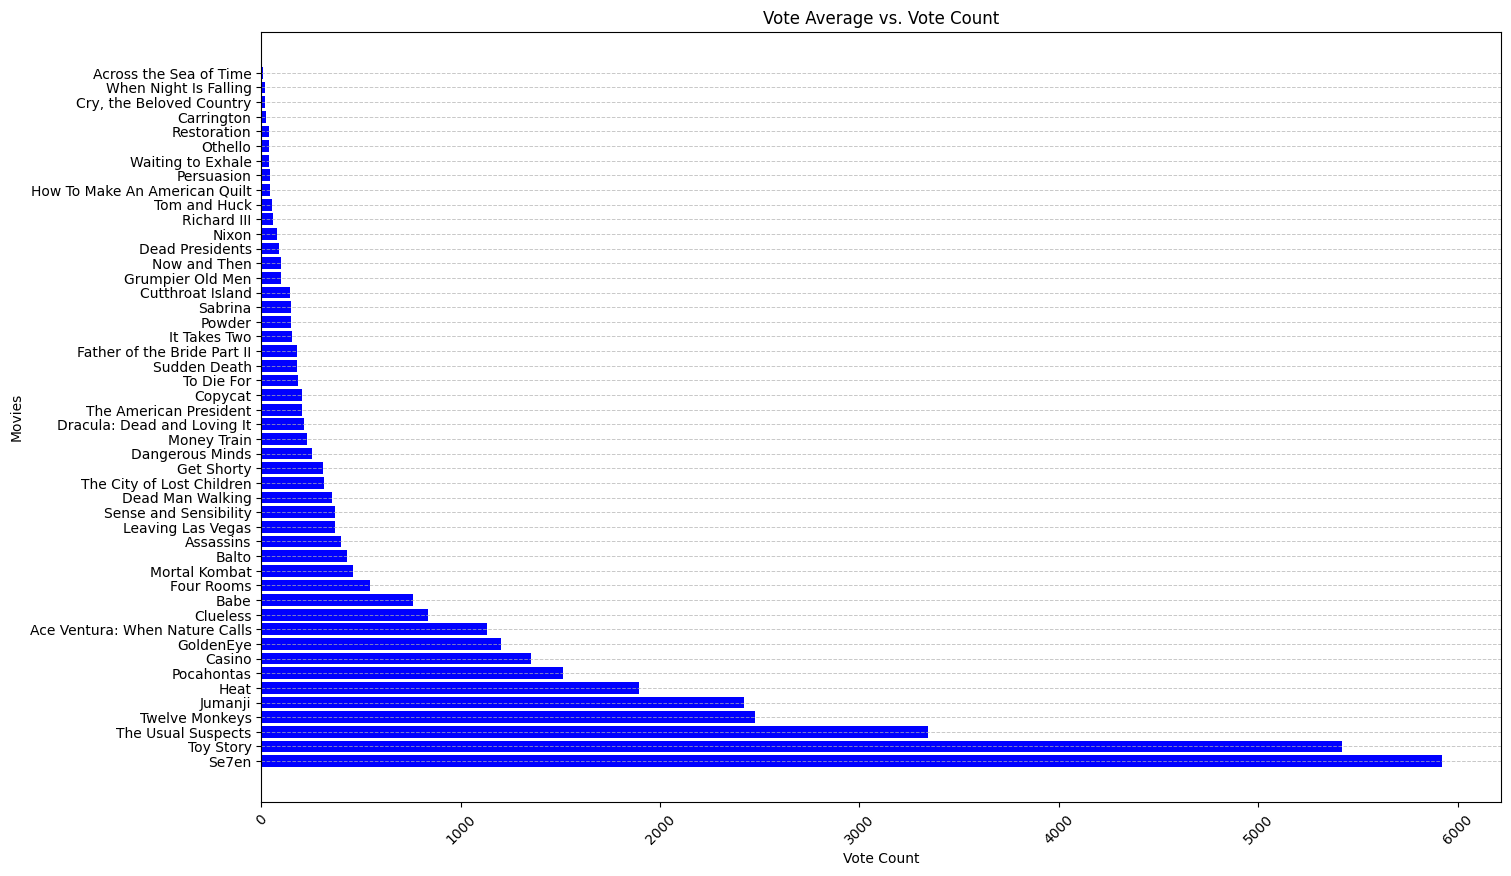

In [19]:
import pandas as pd
from matplotlib import pyplot as plt

# Create the bar graph
df_sorted = df.sort_values(by='vote_count', ascending=False)

plt.figure(figsize=(16, 10))
plt.barh(df_sorted['title'], df_sorted['popularity_score'], color='blue')
plt.title('Vote Average vs. Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Movies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", linewidth=0.7, alpha=0.7)
plt.show()


In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['genres']=le.fit_transform(df['genres'])
df['original_language']=le.fit_transform(df['original_language'])

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

# Fit and transform the weighted average and popularity score
df[['weighted_average', 'popularity_score']]=scaler.fit_transform(df[['weighted_average', 'popularity_score']])
df.head()

,adult,budget,genres,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,weighted_average,popularity_score
45,False,33000000,36,tt0114369,0,Se7en,Two homicide detectives are on a desperate hun...,18.457430,1995-09-22,327311859,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Se7en,8.1,5915,1.000000,1.000000
48,False,6000000,14,tt0114814,0,The Usual Suspects,"Held in an L.A. interrogation room, Verbal Kin...",16.302466,1995-07-19,23341568,106.0,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,The Usual Suspects,8.1,3334,0.951203,0.563593
0,False,30000000,9,tt0114709,0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415,0.804877,0.915398
5,False,60000000,24,tt0113277,0,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,1995-12-15,187436818,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Heat,7.7,1886,0.719859,0.318694
15,False,52000000,15,tt0112641,0,Casino,The life of the gambling paradise  Las Vegas ...,10.137389,1995-11-22,116112375,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Casino,7.8,1343,0.715619,0.226883


In [45]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [46]:
df.columns

Index(['adult', 'budget', 'genres', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'spoken_languages', 'status', 'title', 'vote_average',
       'vote_count', 'weighted_average', 'popularity_score'],
      dtype='object')

In [50]:
user_item_matrix = df.pivot(index='title', columns='popularity', values='weighted_average').fillna(0) # Initialize and fit the KNN model
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(user_item_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [47]:
df.groupby('title')['popularity'].mean().sort_values(ascending=False).head()

,popularity
title,
Toy Story,21.946943
Se7en,18.457430
Heat,17.924927
Jumanji,17.015539
The Usual Suspects,16.302466


In [48]:
df.groupby('title')['popularity'].count().sort_values(ascending=False).head()

,popularity
title,
Ace Ventura: When Nature Calls,1
Across the Sea of Time,1
Mortal Kombat,1
Nixon,1
Now and Then,1


In [49]:
rating=pd.DataFrame(df.groupby('title')['popularity'].mean())
rating.head()

,popularity
title,
Ace Ventura: When Nature Calls,8.205448
Across the Sea of Time,0.114469
Assassins,11.065939
Babe,14.404764
Balto,12.140733


In [51]:
movie_index = df[df['title'] =='Toy Story'].index[0]
distances, indices = knn.kneighbors(user_item_matrix.iloc[movie_index, :].values.reshape(1, -1), n_neighbors=5) # Display recommended movies
recommended_movies = [user_item_matrix.index[idx] for idx in indices.flatten()[1:]]
print(f"Recommended movies like '{'ToyStory'}': {recommended_movies}")

Recommended movies like 'ToyStory': ['Richard III', 'Pocahontas', 'Restoration', 'Powder']
